In [1]:
from datetime import datetime
from metpy.units import units
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt
import metpy.plots as plots
from metpy.plots import SkewT, Hodograph
import metpy.calc as mpcalc
from metpy.calc import lcl, parcel_profile, cape_cin, lifted_index
import numpy as np
%matplotlib inline

In [2]:
file_name = "/Users/zmahatab/Desktop/MetPy/TRACER_M1/Data/housondewnpnM1.b1.20211007.112500.custom.csv"
data = pd.read_csv(file_name)
data.head()

,time,base_time,time_offset,pres,qc_pres,tdry,qc_tdry,dp,qc_dp,wspd,...,u_wind,qc_u_wind,v_wind,qc_v_wind,wstat,asc,qc_asc,lat,lon,alt
0,2021-10-07 11:25:00,2021-10-07,2021-10-07 11:25:00,1016.80,0,17.60,0,17.44,0,0.5,...,0.409576,0,-0.286788,0,NaN,0.0,0,29.670000,-95.060000,7.4
1,2021-10-07 11:25:01,2021-10-07,2021-10-07 11:25:01,1015.63,0,18.80,0,16.92,0,1.2,...,1.177953,0,0.228971,0,NaN,6.9,8,29.670000,-95.059990,17.3
2,2021-10-07 11:25:02,2021-10-07,2021-10-07 11:25:02,1015.07,0,20.17,0,17.19,0,1.5,...,1.455444,0,0.362883,0,NaN,4.7,0,29.670002,-95.059975,22.0
3,2021-10-07 11:25:03,2021-10-07,2021-10-07 11:25:03,1014.37,0,21.14,0,16.87,0,1.6,...,1.545481,0,0.414110,0,NaN,6.0,0,29.670006,-95.059960,28.0
4,2021-10-07 11:25:04,2021-10-07,2021-10-07 11:25:04,1013.60,0,21.88,0,16.47,0,1.7,...,1.642074,0,0.439992,0,NaN,6.7,0,29.670010,-95.059944,34.6


In [3]:
data.describe()

,pres,qc_pres,tdry,qc_tdry,dp,qc_dp,wspd,qc_wspd,deg,qc_deg,...,u_wind,qc_u_wind,v_wind,qc_v_wind,wstat,asc,qc_asc,lat,lon,alt
count,4325.000000,4325.0,4325.000000,4325.0,4325.000000,4325.0,4325.000000,4325.0,4325.000000,4325.0,...,4325.000000,4325.0,4325.000000,4325.0,0.0,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000
mean,334.027924,0.0,-35.533029,0.0,-53.977186,0.0,14.543260,0.0,235.993526,0.0,...,12.361927,0.0,2.343057,0.0,NaN,5.029965,0.001850,29.699141,-94.791782,10958.481387
std,267.859442,0.0,30.978021,0.0,31.743576,0.0,10.471289,0.0,77.802672,0.0,...,11.603392,0.0,5.312320,0.0,NaN,0.515495,0.121646,0.048082,0.226216,6150.897106
min,42.730000,0.0,-71.870000,0.0,-89.470000,0.0,0.500000,0.0,0.000000,0.0,...,-6.632301,0.0,-10.385747,0.0,NaN,0.000000,0.000000,29.638575,-95.066635,7.400000
25%,107.170000,0.0,-63.700000,0.0,-84.530000,0.0,5.000000,0.0,248.000000,0.0,...,1.793606,0.0,-1.238642,0.0,NaN,4.700000,0.000000,29.656378,-95.030815,5834.400000
50%,247.710000,0.0,-46.400000,0.0,-57.400000,0.0,11.100000,0.0,257.000000,0.0,...,10.734405,0.0,2.266240,0.0,NaN,5.000000,0.000000,29.675545,-94.830444,10950.900000
75%,502.720000,0.0,-6.310000,0.0,-29.010000,0.0,21.100000,0.0,265.000000,0.0,...,20.477629,0.0,5.353838,0.0,NaN,5.300000,0.000000,29.756578,-94.529100,16180.500000
max,1016.800000,0.0,24.700000,0.0,17.440000,0.0,35.500000,0.0,359.000000,0.0,...,33.171150,0.0,13.323934,0.0,NaN,7.000000,8.000000,29.762854,-94.492430,21767.700000


In [4]:
# extracting data
pressure = data['pres'].values * units.hPa
dry_temp = data['tdry'].values * units.degC
dew_point = data['dp'].values * units.degC
wind_speed = data['wspd'].values * units.knot
u_wind = data['u_wind'].values * units.knot
v_wind = data['v_wind'].values * units.knot
height = data['alt'].values * units.metre

In [5]:
# initializing figure and slots
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[5,2.5])
gs_bottom = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs[1], width_ratios=[3,2])

In [6]:
# SkewT
skew = plots.SkewT(fig, subplot=gs[0])
skew.ax.set_xlim(-90, 30)
skew.ax.set_ylim(1050, 100)

(1050.0, 100.0)

In [7]:
# hodograph
ax_hod = fig.add_subplot(gs_bottom[0])
hod = Hodograph(ax_hod, component_range=40)
hod.add_grid(increment=10)
hod.add_grid(increment=20, color='tab:orange', linestyle='-')

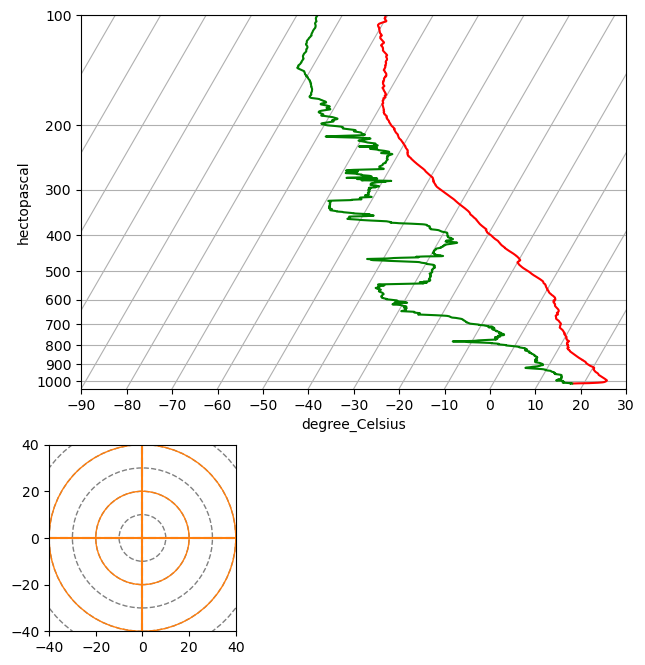

In [8]:
skew.plot(pressure, dry_temp, 'red', label='Temperature')
skew.plot(pressure, dew_point, 'green', label='Dew Point')
fig

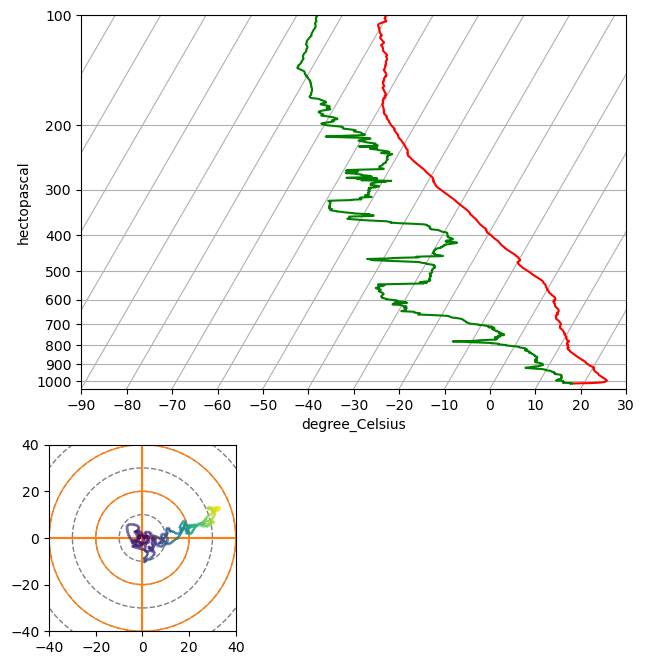

In [9]:
hod.plot_colormapped(u_wind, v_wind, wind_speed, linewidth=2)
fig

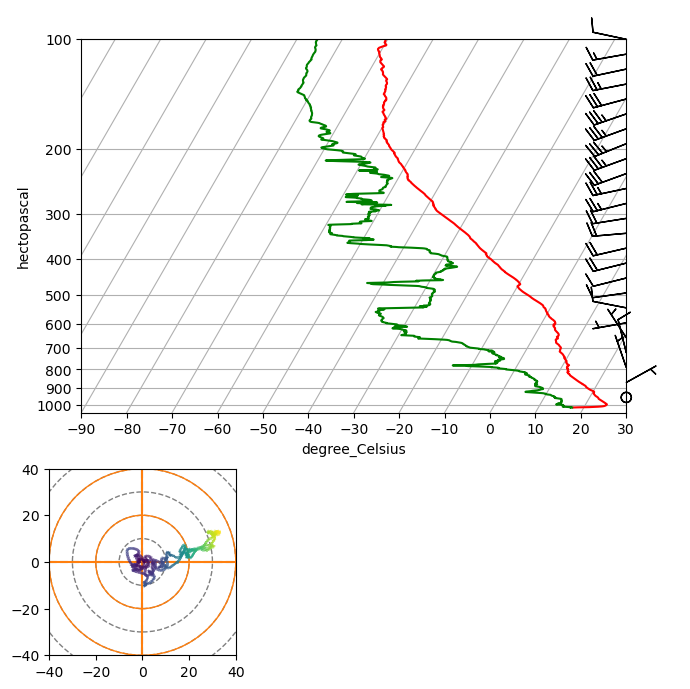

In [10]:
# fixing wind barbs
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(pressure, interval)
skew.plot_barbs(pressure[idx][::2], u_wind[idx][::2], v_wind[idx][::2])
fig

In [11]:
parcel_path = mpcalc.parcel_profile(pressure, dry_temp[0], dew_point[0])

In [12]:
#stats
lfc_pressure, lfc_temp = mpcalc.lfc(pressure, dry_temp, dew_point)
lcl_pressure, lcl_temp = mpcalc.lcl(pressure[0], dry_temp[0], dew_point[0])
surface_cape, surface_cin = mpcalc.surface_based_cape_cin(pressure, dry_temp, dew_point)
li = lifted_index(pressure, dry_temp, parcel_path)
el = mpcalc.el(pressure, dry_temp, dew_point)
mu_cape, mu_cin = mpcalc.most_unstable_cape_cin(pressure, dry_temp, dew_point)

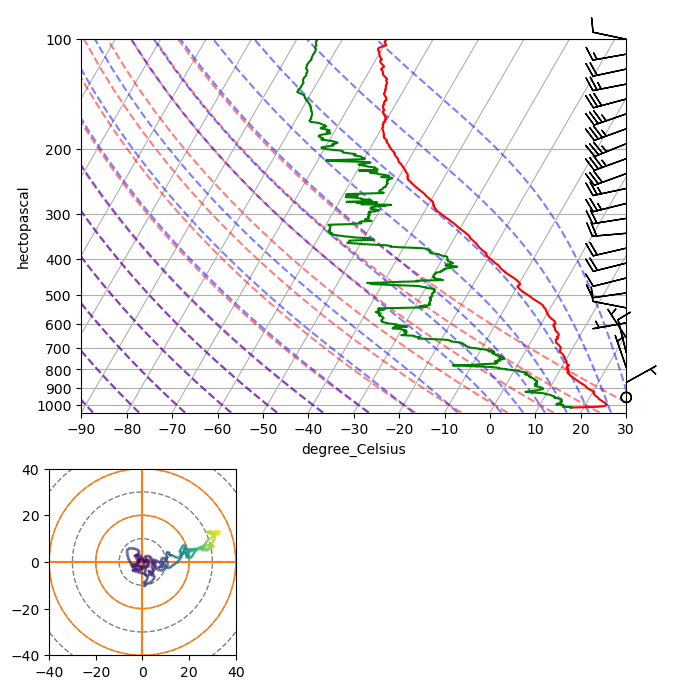

In [13]:
# fiducial lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
fig

In [14]:
parcel_path = mpcalc.parcel_profile(pressure, dry_temp[0], dew_point[0])

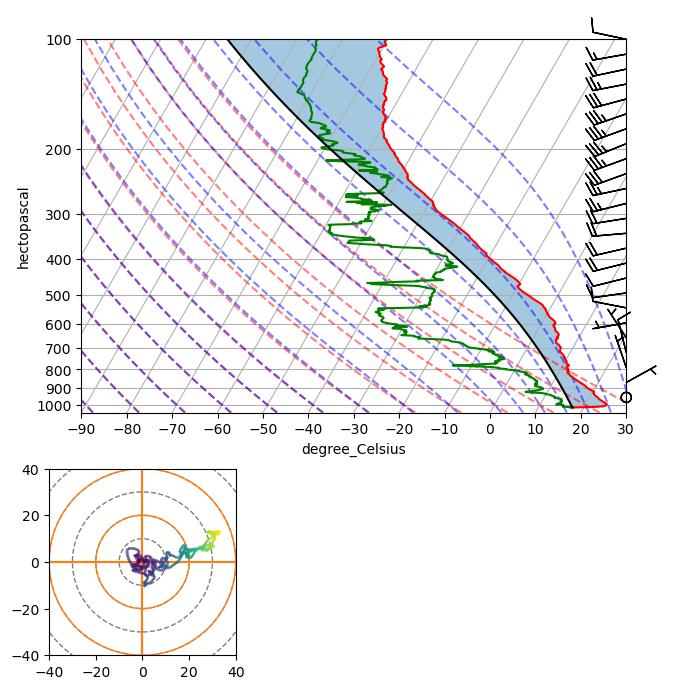

In [15]:
skew.plot(pressure, parcel_path, color='black')
skew.shade_cape(pressure, dry_temp, parcel_path)
skew.shade_cin(pressure, dry_temp, parcel_path)
fig

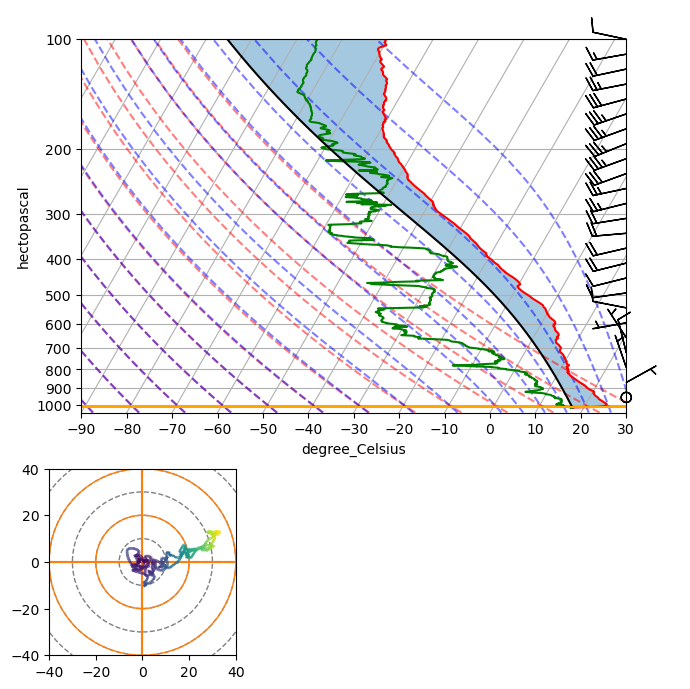

In [16]:
# horizontal lines
skew.ax.axhline(el[0], color="blue", label="Equilibrium level")
skew.ax.axhline(lfc_pressure, color="purple", label="LFC Pressure")
skew.ax.axhline(lcl_pressure, color="orange", label="LCL Pressure")
fig

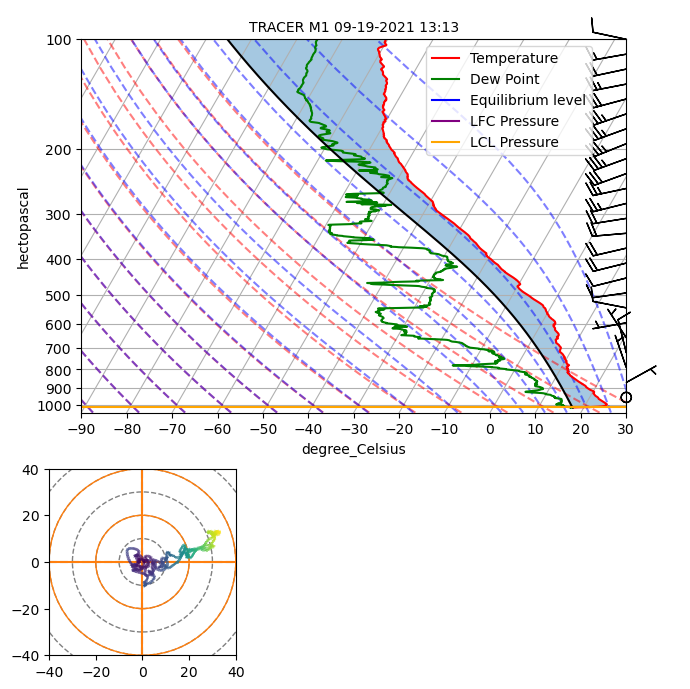

In [17]:
skew.ax.set_title('TRACER M1 09-19-2021 13:13', fontsize=10)
skew.ax.legend(loc='best', bbox_to_anchor=(0.95, 1), fontsize=10, frameon=True)
fig

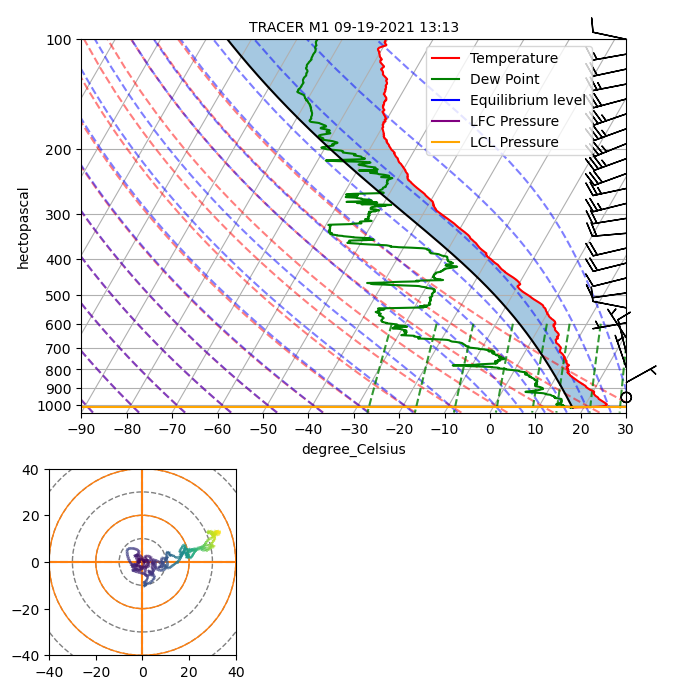

In [18]:
skew.plot_mixing_lines()
fig

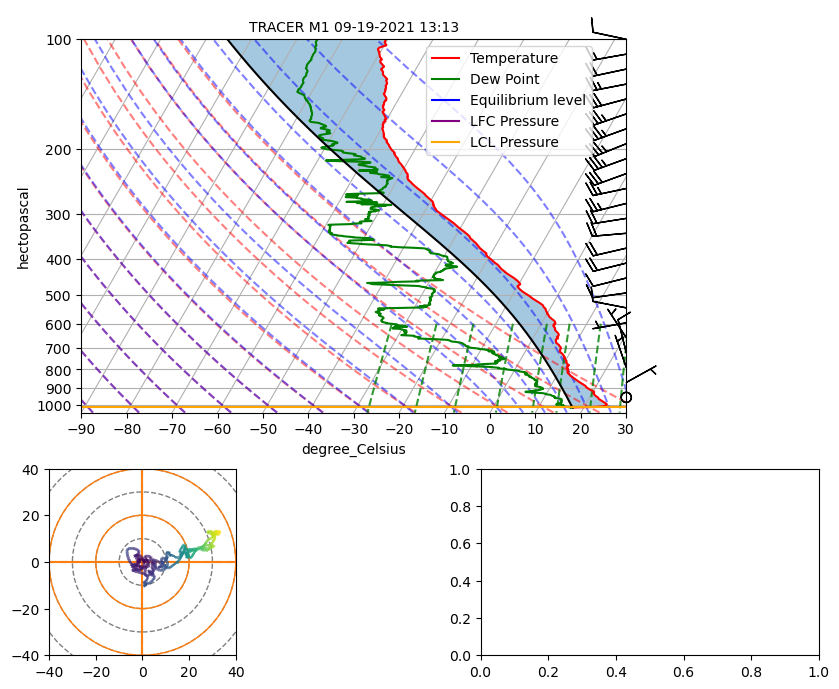

In [19]:
# stats axis
ax_stats = fig.add_subplot(gs_bottom[1])
fig

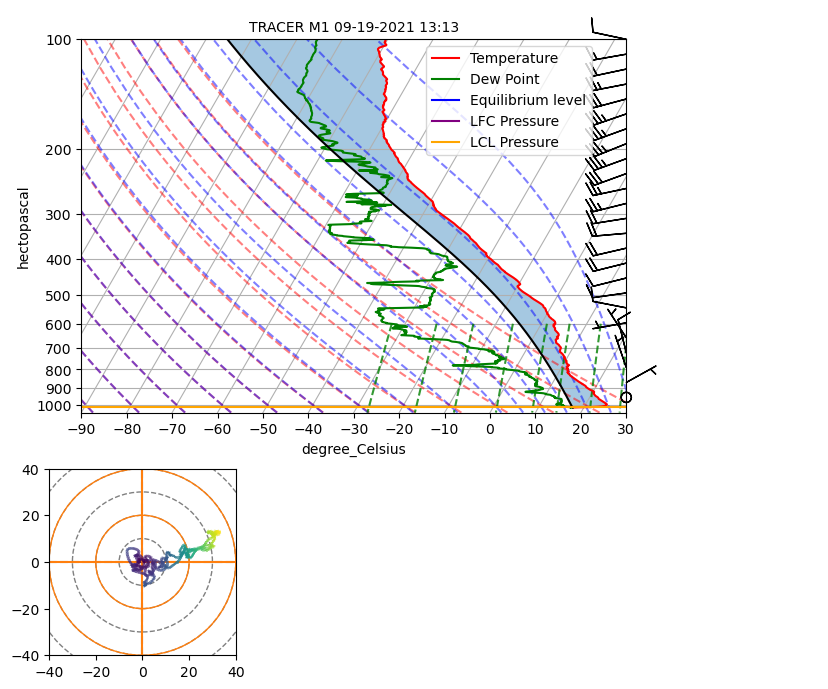

In [20]:
# removing stats box
ax_stats.set_xticks([])
ax_stats.set_yticks([])
ax_stats.spines['top'].set_visible(False)
ax_stats.spines['bottom'].set_visible(False)
ax_stats.spines['left'].set_visible(False)
ax_stats.spines['right'].set_visible(False)
fig

In [21]:
# stats dictionary
stats_values = {
    "Equilibrium Level (hPa)": el[0].magnitude,
    r"Equilibrium Level ($^\circ$C)": el[1].magnitude,
    r"MUCAPE (J$\,$kg$^{-1}$)": mu_cape.magnitude,
    r"MUCIN (J$\,$kg$^{-1}$)": mu_cin.magnitude,
    r"Surface CAPE (J$\,$kg$^{-1}$)": surface_cape.magnitude,
    r"Surface CIN (J$\,$kg$^{-1}$)": surface_cin.magnitude,
    "LCL Pressure (hPa)": lcl_pressure.magnitude,
    r"LCL Temperature ($^\circ$C)": lcl_temp.magnitude,
    "LFC Pressure (hPa)": lfc_pressure.magnitude,
    r"LFC Temperature ($^\circ$C)": lfc_temp.magnitude
}

In [22]:
stats_values

{'Equilibrium Level (hPa)': nan,
 'Equilibrium Level ($^\\circ$C)': nan,
 'MUCAPE (J$\\,$kg$^{-1}$)': 0,
 'MUCIN (J$\\,$kg$^{-1}$)': 0,
 'Surface CAPE (J$\\,$kg$^{-1}$)': 0,
 'Surface CIN (J$\\,$kg$^{-1}$)': 0,
 'LCL Pressure (hPa)': 1014.3826602425185,
 'LCL Temperature ($^\\circ$C)': 17.402338117052068,
 'LFC Pressure (hPa)': nan,
 'LFC Temperature ($^\\circ$C)': nan}

In [23]:
x_left = -0.3
x_right = 0.4

y_start = 0.95
y_spacing = 0.1

In [24]:
for i, (label, value) in enumerate(stats_values.items()):
    ax_stats.text(x_left, y_start - i * y_spacing, f"{label}:", fontsize=10, ha='left', va='top', family='monospace') # labels
    ax_stats.text(x_right, y_start - i * y_spacing, f"{value:.2f}", fontsize=10, ha='right', va='top',family='monospace') # values 

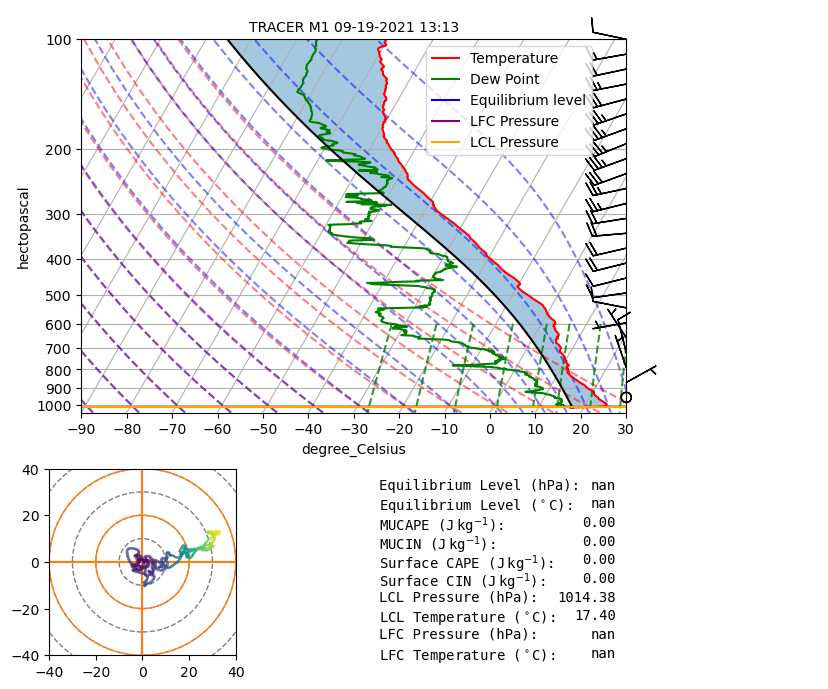

In [25]:
fig

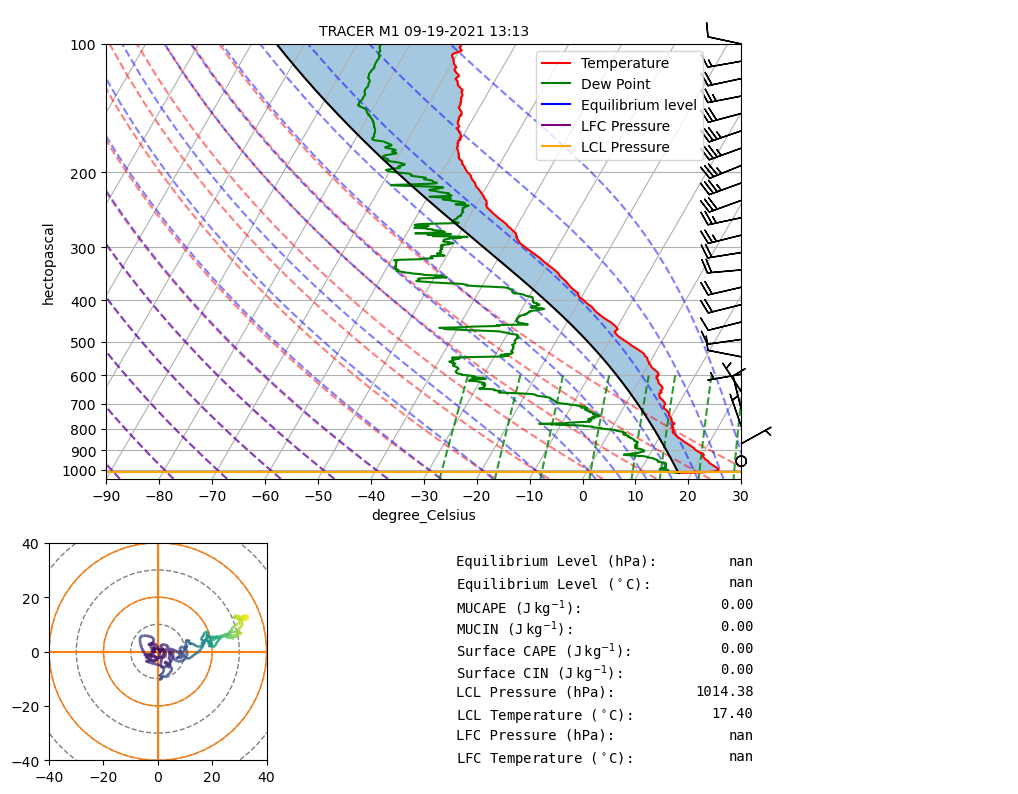

In [26]:
plt.tight_layout()
fig

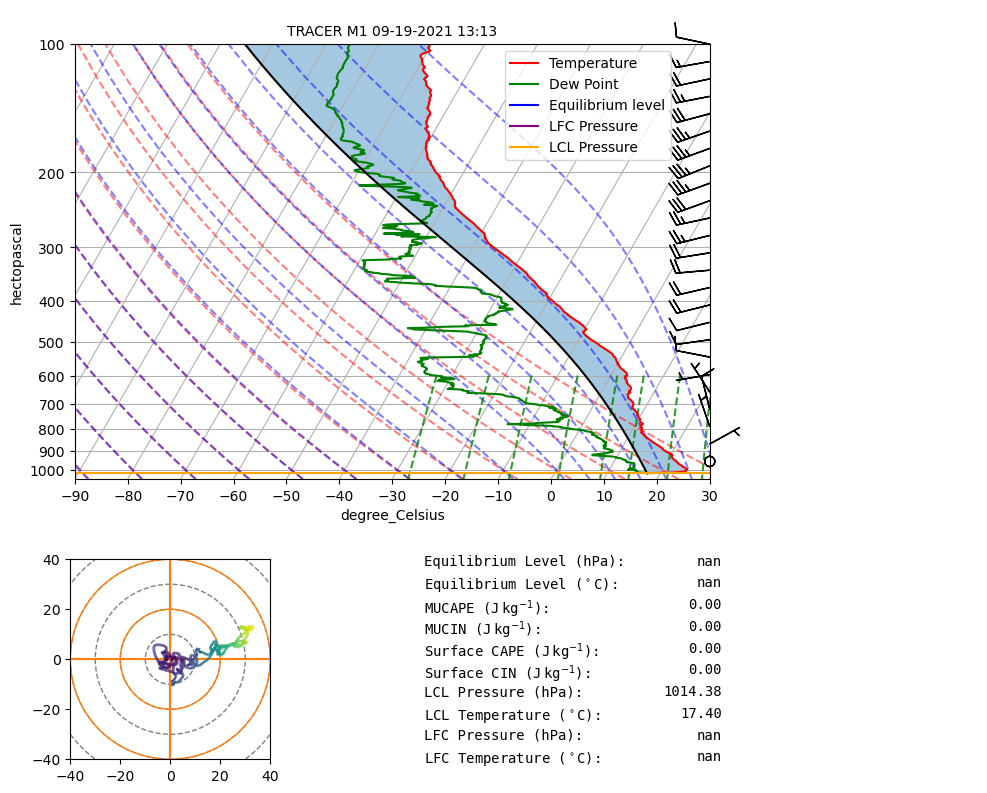

In [27]:
ax_hod.set_position([0.19, 0.05, 0.25, 0.25])
fig

In [28]:
# fig.savefig('Stats_Fig/TRACERM1_20210919_131300_stats.png', dpi=300)

In [29]:
el

(<Quantity(nan, 'hectopascal')>, <Quantity(nan, 'degree_Celsius')>)